In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping






In [3]:
p = Path().cwd()
q = p/"drive/MyDrive/Colab Notebooks/Brands"  # used p to create a path to the data
target_dict = {"Fake": 1, "Original": 0}  # creating dictionary mapping to data labels to integer labels
images = []  # create an empty list
labels = []  # create an empty list

for fldr in q.iterdir():
    current_label = fldr.name  # get the name of the current label

    for subfldr1 in fldr.iterdir():
        current_sublabel1 = subfldr1.name  # get the name of the current sublabel (transportation, food and beverages, electronics and fashion)

        for subfldr2 in subfldr1.iterdir():
            current_sublabel2 = subfldr2.name  # get the name of the current sublabel (fake, original)

            for img in subfldr2.iterdir():
                if img.is_file():  # check if the current item is a file
                    img = load_img(img, color_mode="grayscale")  # load image as grayscale
                    img_array = img_to_array(img)  # convert the image to a NumPy array
                    img_array_resized = smart_resize(img_array, (256, 256))  # resize the image to 256 by 256
                    images.append(img_array_resized)  # add resized image to list of images
                    labels.append(target_dict[current_sublabel2])  # add label for this image to the list of labels


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


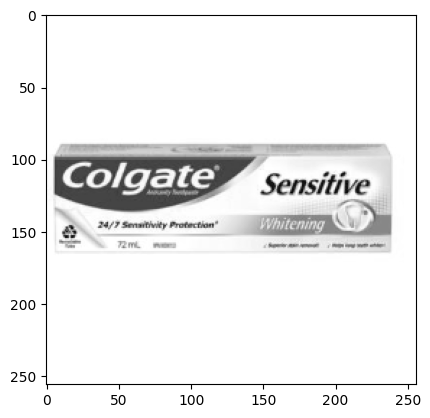

In [4]:
plt.imshow(images[190], cmap='gray')

In [5]:
target_dict

{'Fake': 1, 'Original': 0}

In [6]:
print(labels[190])

0


In [7]:

def train_test_validation_data(images, labels, test_size=0.2, random_state=42):
    # Splitting the data into training, validation, and test sets
    train_images, test_images, train_labels, test_labels = train_test_split(
        images, labels, test_size=test_size, random_state=random_state)
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=test_size, random_state=random_state)

    # Converting values to numpy array
    train_images = np.array(train_images)
    test_images = np.array(test_images)
    val_images = np.array(val_images)

    # Scaling values to [0, 1] interval
    train_images = train_images / 255
    test_images = test_images / 255
    val_images = val_images / 255

    # Convert labels to numeric arrays
    train_labels = np.array(train_labels)
    test_labels = np.array(test_labels)
    val_labels = np.array(val_labels)


    return train_images, val_images, test_images, train_labels, val_labels, test_labels
train_images, val_images, test_images, train_labels, val_labels, test_labels = train_test_validation_data(images, labels)


